In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpt
#from tensorflow.keras.models import model
import tensorflow as tf
import numpy as np
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
import torchsummary
import seaborn as sns
import matplotlib.pylab as plt


In [ ]:
transform=transforms.ToTensor()
data_=datasets.MNIST(root='./data',train=True,download=True,transform=transform)



Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
data_loader=torch.utils.data.DataLoader(dataset=data_,batch_size=64,shuffle=True)

In [ ]:
class autoencoder(nn.Module):
 def __init__(self):
   super().__init__()
   self.encoder=nn.Sequential(
                              nn.Linear(28*28,128),nn.ReLU(),
                              nn.Linear(128,64),nn.ReLU(),
                              nn.Linear(64,32),nn.ReLU(),
                              nn.Linear(32,16),nn.ReLU(),
                              nn.Linear(16,3))
   self.decoder=nn.Sequential(
                              nn.Linear(3,16),nn.ReLU(),
                              nn.Linear(16,32),nn.ReLU(),
                              nn.Linear(32,64),nn.ReLU(),
                              nn.Linear(64,128),nn.ReLU(),
                              nn.Linear(128,28*28),
                              nn.Sigmoid())
 def forward(self,x):
     encoder=self.encoder(x)
     decoder=self.decoder(encoder)
     return decoder

In [ ]:
model=autoencoder()
loss=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-2,weight_decay=1e-5)

In [ ]:
num_epochs=10
outputs=[]
for i in range(num_epochs):
  for (img,_ )  in data_loader:
    img=img.reshape(-1,28*28)
    recon=model(img)
    loss1=loss(recon,img)
    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()
  print(f'epoch:{i+1},loss={loss1.item()}')
  outputs.append((i,img,recon))

epoch:1,loss=0.03884047269821167
epoch:2,loss=0.04155547916889191
epoch:3,loss=0.03824785351753235
epoch:4,loss=0.036643270403146744
epoch:5,loss=0.03586895018815994
epoch:6,loss=0.02996065467596054
epoch:7,loss=0.03843409940600395
epoch:8,loss=0.03442087024450302
epoch:9,loss=0.03549748659133911
epoch:10,loss=0.03265370801091194


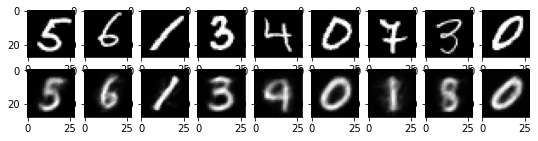

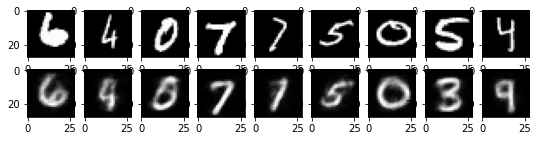

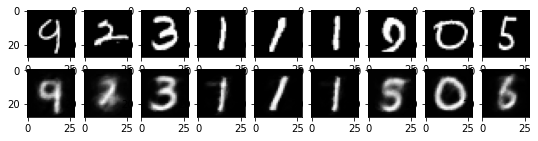

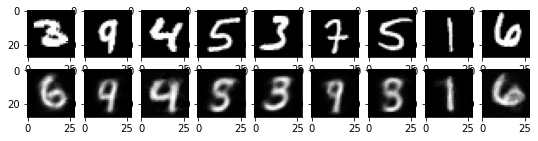

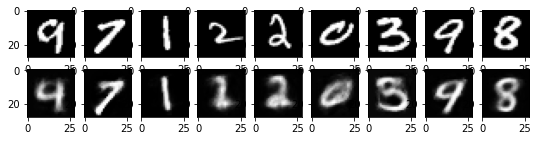

In [ ]:
for k in range(0,num_epochs,2):
  plt.figure(figsize=(9,2))
  plt.gray()
  img=outputs[k][1].detach().numpy()
  recon=outputs[k][2].detach().numpy()
  for i, item in enumerate(img):
    if i >=9: break
    plt.subplot(2,9,i+1)
    item=item.reshape(-1,28,28)
    plt.imshow(item[0])
  for i, item1 in enumerate(recon):
    if i >=9: break
    plt.subplot(2,9,9+i+1)
    item1=item1.reshape(-1,28,28)
    plt.imshow(item1[0])

In [ ]:
class autoencoder_cnn(nn.Module):
 def __init__(self):
   super().__init__()
   self.encoder=nn.Sequential(
                              nn.Conv2d(1,16,3,stride=2,padding=1),nn.ReLU(),
                              nn.Conv2d(16,32,3,stride=2,padding=1),nn.ReLU(),
                              nn.Conv2d(32,64,7))
   self.decoder=nn.Sequential(
                              nn.ConvTranspose2d(64,32,7),nn.ReLU(),
                              nn.ConvTranspose2d(32,16,3,stride=2,padding=1,output_padding=1),nn.ReLU(),
                              nn.ConvTranspose2d(16,1,3,stride=2,padding=1,output_padding=1),nn.ReLU(),
                              nn.Sigmoid())
                             
 def forward(self,x):
     encoder=self.encoder(x)
     decoder=self.decoder(encoder)
     return decoder

In [ ]:
model1=autoencoder_cnn()

In [ ]:
num_epochs=10
outputs=[]
for i in range(num_epochs):
  for (img,_ )  in data_loader:
    recon=model1(img)
    loss1=loss(recon,img)
    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()
  print(f'epoch:{i+1},loss={loss1.item()}')
  outputs.append((i,img,recon))

epoch:1,loss=0.23154953122138977
epoch:2,loss=0.2307506501674652
epoch:3,loss=0.23143674433231354
epoch:4,loss=0.23154392838478088
epoch:5,loss=0.2312489151954651
epoch:6,loss=0.23181650042533875
epoch:7,loss=0.2323867827653885
epoch:8,loss=0.23045115172863007
epoch:9,loss=0.2305089235305786
epoch:10,loss=0.2327081859111786


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


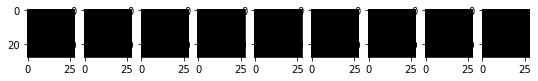

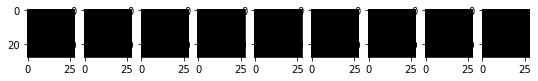

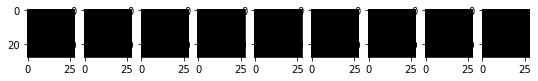

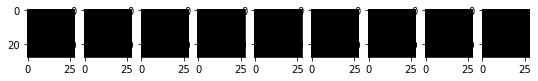

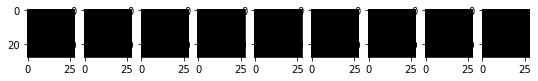

In [ ]:
for k in range(0,num_epochs,2):
  plt.figure(figsize=(9,2))
  plt.gray()
  img=outputs[k][1].detach().numpy()
  recon=outputs[k][2].detach().numpy()
  for i, item in enumerate(img):
    if i >=9: break
    plt.subplot(2,9,i+1)
    plt.imshow(item[0])
  for i, item in enumerate(recon):
    if i >=9: break
    plt.subplot(2,9,i+1)
    plt.imshow(item[0])